In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import learning_curve

import joblib

In [207]:
pd.set_option("display.max_columns", None)

In [208]:
data = pd.read_csv('/content/Customer_Churn.csv')

In [209]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,NaN,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [210]:
data.drop(columns=['customerID', 'PaymentMethod'], inplace=True)
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,NaN,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,NaN,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,NaN,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.3,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,NaN,151.65,Yes


In [211]:
data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [212]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [213]:
data.shape

(7043, 19)

In [214]:
data.dropna(inplace=True)

In [215]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,89.10,1949.4,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes
10,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,49.95,587.45,No


In [216]:
data.drop_duplicates(inplace=True)

In [217]:
data.shape

(7002, 19)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 3 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7002 non-null   object 
 1   SeniorCitizen     7002 non-null   object 
 2   Partner           7002 non-null   object 
 3   Dependents        7002 non-null   object 
 4   tenure            7002 non-null   int64  
 5   PhoneService      7002 non-null   object 
 6   MultipleLines     7002 non-null   object 
 7   InternetService   7002 non-null   object 
 8   OnlineSecurity    7002 non-null   object 
 9   OnlineBackup      7002 non-null   object 
 10  DeviceProtection  7002 non-null   object 
 11  TechSupport       7002 non-null   object 
 12  StreamingTV       7002 non-null   object 
 13  StreamingMovies   7002 non-null   object 
 14  Contract          7002 non-null   object 
 15  PaperlessBilling  7002 non-null   object 
 16  MonthlyCharges    7002 non-null   float64
 17  

In [219]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,89.10,1949.4,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes
10,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,49.95,587.45,No


In [220]:
x = data.drop(columns=['Churn'])
y = data['Churn']

In [221]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [246]:
print(encoder.classes_)

['No' 'Yes']


In [222]:
y.shape

(7002,)

In [223]:
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 3 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7002 non-null   object 
 1   SeniorCitizen     7002 non-null   object 
 2   Partner           7002 non-null   object 
 3   Dependents        7002 non-null   object 
 4   tenure            7002 non-null   int64  
 5   PhoneService      7002 non-null   object 
 6   MultipleLines     7002 non-null   object 
 7   InternetService   7002 non-null   object 
 8   OnlineSecurity    7002 non-null   object 
 9   OnlineBackup      7002 non-null   object 
 10  DeviceProtection  7002 non-null   object 
 11  TechSupport       7002 non-null   object 
 12  StreamingTV       7002 non-null   object 
 13  StreamingMovies   7002 non-null   object 
 14  Contract          7002 non-null   object 
 15  PaperlessBilling  7002 non-null   object 
 16  MonthlyCharges    7002 non-null   float64
 17  

In [224]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
obj_cols = [col for col in x.columns if col not in num_cols]

In [225]:
data.to_csv('Updated_Data.csv', index=False)

In [226]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [227]:
x_data = xtrain
y_data = ytrain
print(x_data.shape, y_data.shape)

(4901, 18) (4901,)


In [228]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
obj_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop='first', sparse_output=False))
])

In [229]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("obj", obj_transformer, obj_cols)
])

In [230]:
preprocessor.fit_transform(x_data)

array([[ 0.0654548 , -0.08171988, -0.00781305, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87903317,  1.07289922,  1.24793936, ...,  0.        ,
         1.        ,  1.        ],
       [-0.82948142, -0.71166402, -0.77059944, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.10613371,  0.26416457,  0.07856378, ...,  1.        ,
         0.        ,  1.        ],
       [-0.74812358, -0.12349336, -0.64979945, ...,  0.        ,
         1.        ,  1.        ],
       [-1.11423385, -1.49032176, -0.96268726, ...,  0.        ,
         0.        ,  1.        ]])

In [231]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [232]:
scorer = make_scorer(f1_score, average='binary')

In [233]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=x_data,
		y=y_data,
		cv=3,
		scoring=scorer,
		n_jobs=-1,
		random_state=42
	)

	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()

In [234]:
algorithms = {
	"Logistic Regression": LogisticRegression(),
	"Support Vector Machine": SVC(),
	"Random Forest": RandomForestClassifier(n_estimators=10),
	"Gradient Boosting": GradientBoostingClassifier()
}

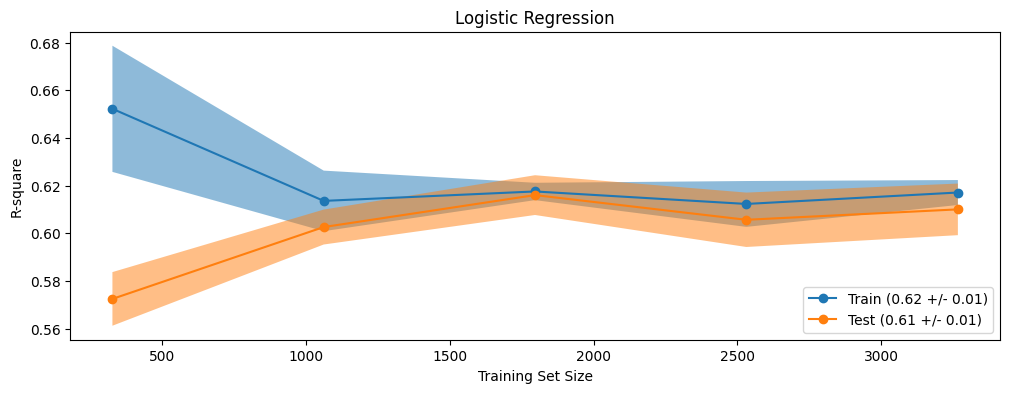

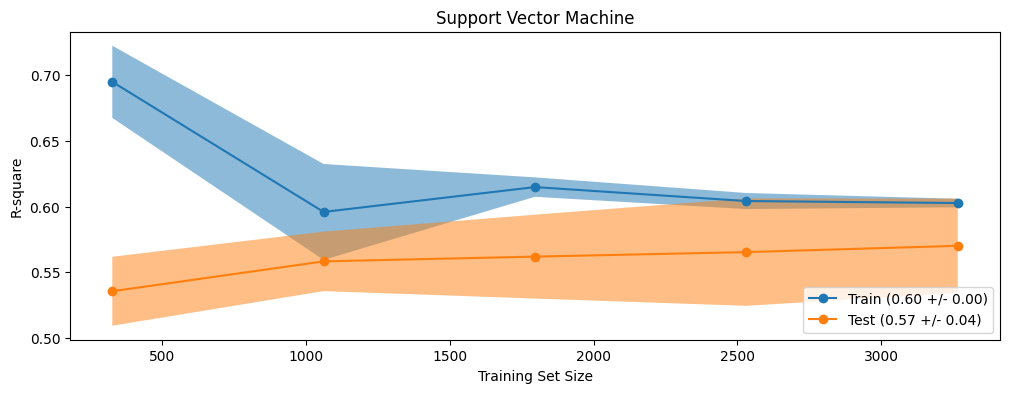

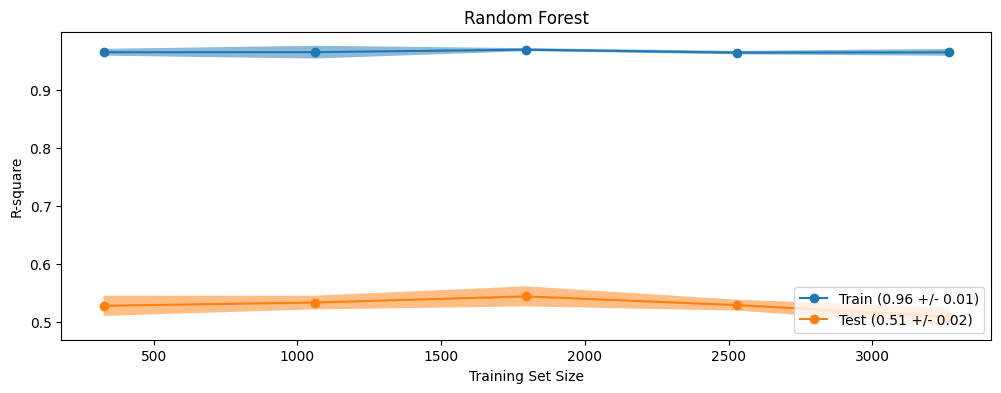

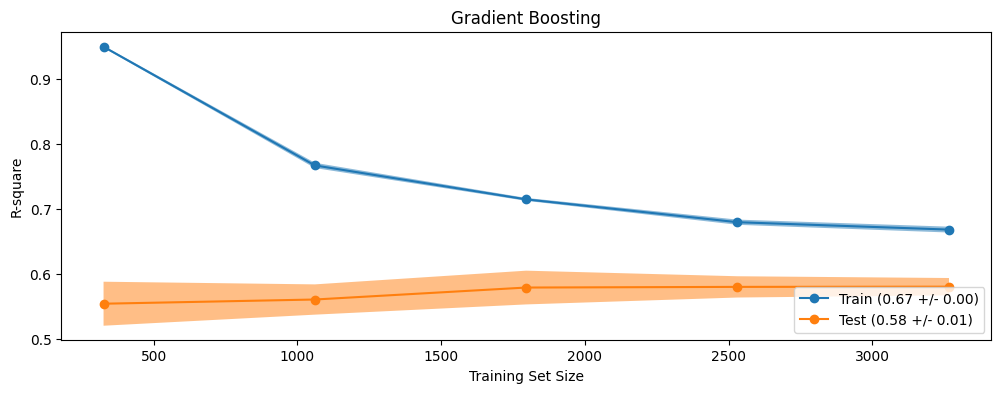

In [235]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

In [236]:
model = Pipeline(steps=[
	("pre", preprocessor),
	("rf", GradientBoostingClassifier())
])

In [237]:
model.fit(x_data, y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('obj',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling'])])),
                ('rf', GradientBoostingClassifier())])

In [238]:
def evaluate_model(X, y):
	y_pred = model.predict(X)
	return f1_score(y, y_pred, average='binary')

In [239]:
print(f"Accuracy on Training data: {evaluate_model(x_data, y_data)}")

Accuracy on Training data: 0.6482112436115843


In [240]:
print(f"Accuracy on Testing data: {evaluate_model(xtest, ytest)}")

Accuracy on Testing data: 0.5445026178010471


In [241]:
joblib.dump(model, "model.joblib")

['model.joblib']